In [20]:
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

In [34]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "chest_xray/val",
    image_size = (224,224)
)

Found 16 files belonging to 2 classes.


In [2]:
model = load_model(r'Models/model_vgg16.h5')

In [14]:
class_names = ['NORMAL', 'PNEUMONIA']

In [15]:
img = image.load_img(r'chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg', target_size=(224,244))

In [36]:
def predict(model, img):
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_data = preprocess_input(img_array)

    predictions = model.predict(img_data)
    confidence = round(100 * (np.max(predictions[0])), 2)
    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class, confidence

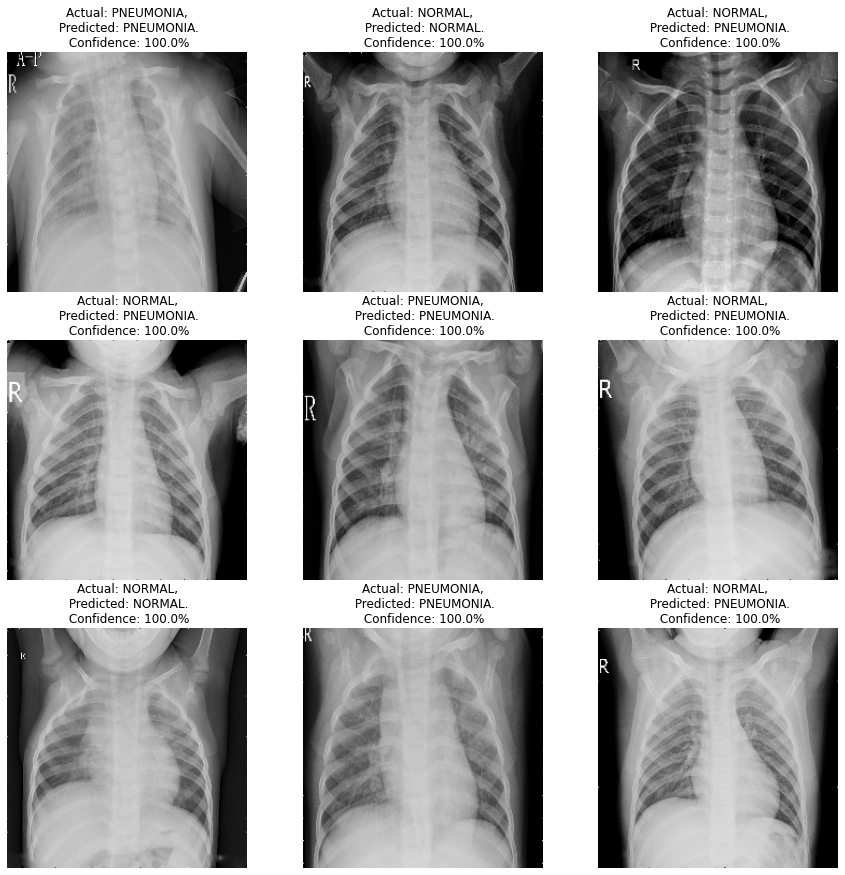

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")